Text Extracting From Structured Document

In [ ]:
from pdf2image import convert_from_path
import pytesseract

# Path to the PDF file
pdf_path = "C:/Users/yguru/Downloads/Image_9.pdf"
# Convert PDF to images
images = convert_from_path(pdf_path)

# Extract text from each image
extracted_text = ""
for img in images:
    extracted_text += pytesseract.image_to_string(img) + "\n"

# Save the extracted text to a file
with open("extracted_text.txt", "w", encoding="utf-8") as text_file:
    text_file.write(extracted_text)

print("Text extraction completed. Check extracted_text.txt")


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL to scrape
url = "https://finance.yahoo.com/markets/mutualfunds/top/"

# Send a GET request
response = requests.get(url)

# Check if request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Extract financial data (example: table rows)
    data = []
    table_rows = soup.find_all("tr")
    for row in table_rows:
        cols = row.find_all("td")
        cols = [col.get_text(strip=True) for col in cols]
        data.append(cols)
    
    # Convert to DataFrame and save to CSV
    df = pd.DataFrame(data)
    df.to_csv("financial_data.csv", index=False)
    print("Data saved to financial_data.csv")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


In [ ]:
import cv2
import pytesseract
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Function to extract text from an image
def extract_text_from_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray)
    return text

# Function to save extracted text to CSV
def save_text_to_csv(text, csv_filename):
    words = text.split()
    df = pd.DataFrame(words, columns=['Words'])
    df.to_csv(csv_filename, index=False)
    return words

# Function to visualize word frequency with bar, pie, line, and scatter plots
def visualize_word_frequency(words):
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(10)
    words, counts = zip(*most_common_words)
    indices = np.arange(len(words))
    
    plt.figure(figsize=(15,10))
    
    # Bar chart
    plt.subplot(2, 2, 1)
    plt.bar(words, counts, color='skyblue')
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Top 10 Word Frequencies")
    plt.xticks(rotation=45)
    
    # Pie chart
    plt.subplot(2, 2, 2)
    plt.pie(counts, labels=words, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'coral', 'gold', 'pink', 'purple', 'red', 'brown', 'orange', 'gray'])
    plt.title("Word Distribution")
    
    # Line graph
    plt.subplot(2, 2, 3)
    plt.plot(words, counts, marker='o', linestyle='-', color='green')
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Word Frequency Line Graph")
    plt.xticks(rotation=45)
    
    # Scatter plot
    plt.subplot(2, 2, 4)
    plt.scatter(indices, counts, color='red')
    plt.xticks(indices, words, rotation=45)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Word Frequency Scatter Plot")
    
    plt.tight_layout()
    plt.show()

# Main function
def main():
    image_path = 'D:/vscode infosis/retrived images/invoice/Image_17.jpeg' # Change this to your image file
    csv_filename = 'extracted_text.csv'
    
    text = extract_text_from_image(image_path)
    words = save_text_to_csv(text, csv_filename)
    visualize_word_frequency(words)

if __name__ == "__main__":
    main()


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL to scrape
url = "https://finance.yahoo.com/markets/mutualfunds/top/"

# Set headers to mimic a real browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
}

# Send a GET request
response = requests.get(url, headers=headers)

# Check if request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Extract financial data (example: table rows)
    data = []
    table_rows = soup.find_all("tr")
    for row in table_rows:
        cols = row.find_all("td")
        cols = [col.get_text(strip=True) for col in cols]
        data.append(cols)
    
    # Convert to DataFrame and save to CSV
    df = pd.DataFrame(data)
    df.to_csv("financial_data.csv", index=False, encoding="utf-8")
    print("Data saved to financial_data.csv")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


In [ ]:
import cv2
import pytesseract
import numpy as np

# Load the image
image_path = "D:/vscode infosis/retrived images/invoice/Image_17.jpeg"  # Change this to your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform OCR to extract text and bounding boxes
data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)

# Draw bounding boxes around detected text
for i in range(len(data["text"])):
    if int(data["conf"][i]) > 50:  # Confidence threshold
        x, y, w, h = data["left"][i], data["top"][i], data["width"][i], data["height"][i]
        text = data["text"][i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show the image with extracted text
cv2.imshow("Text Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from collections import Counter
import string

# Ensure NLTK stopwords are downloaded
nltk.download("stopwords")
from nltk.corpus import stopwords

# Folder containing extracted text files
output_folder = r"D:\\vscode infosis\\processed_images"

# Read all extracted text files
text_data = ""
for file in os.listdir(output_folder):
    if file.endswith(".txt"):  # Read only text files
        with open(os.path.join(output_folder, file), "r", encoding="utf-8") as f:
            text_data += f.read() + " "

# Remove punctuation and convert to lowercase
text_data = text_data.translate(str.maketrans("", "", string.punctuation)).lower()

# Remove stopwords (common words like "the", "and", etc.)
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in text_data.split() if word not in stop_words]

# Count word frequency
word_counts = Counter(filtered_words)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))

# Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Extracted Text", fontsize=14)
plt.show()

# Plot Bar Chart for Top 10 Most Frequent WoX   Qrds
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color="skyblue")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words in Extracted Text")
plt.xticks(rotation=45)
plt.show()


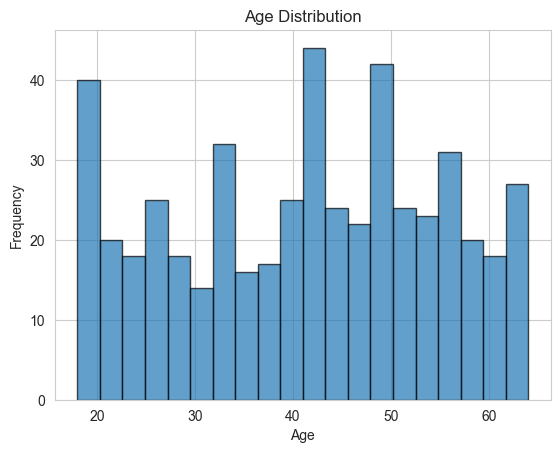

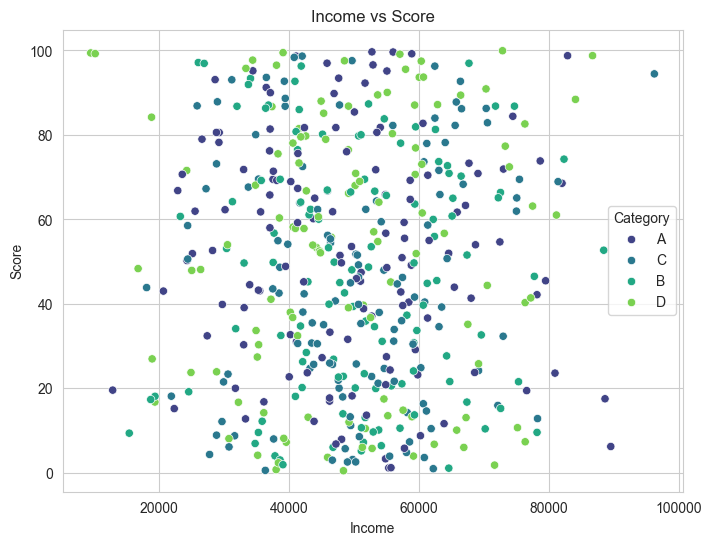

C:\Users\yguru\AppData\Local\Temp\ipykernel_48868\1906162706.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Category'], palette='pastel')


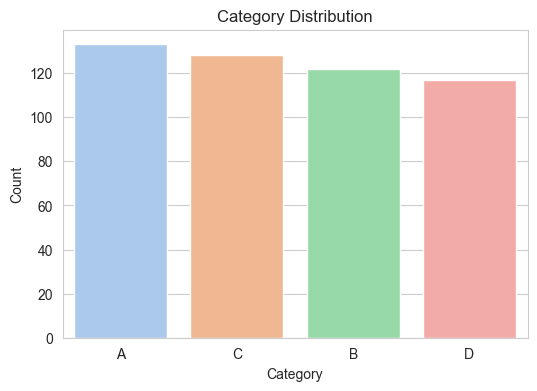

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 500
data = {
    'Age': np.random.randint(18, 65, num_samples),
    'Income': np.random.normal(50000, 15000, num_samples),
    'Category': np.random.choice(['A', 'B', 'C', 'D'], num_samples),
    'Score': np.random.uniform(0, 100, num_samples)
}
df = pd.DataFrame(data)

# Visualization
sns.set_style("whitegrid")

# Histogram for Age
df['Age'].hist(bins=20, edgecolor='black', alpha=0.7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Scatter plot of Income vs. Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['Score'], hue=df['Category'], palette='viridis')
plt.title("Income vs Score")
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()

# Bar plot for category distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Category'], palette='pastel')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [ ]:
CATEGORIZATION

CSV file 'grocery_expenditure.csv' generated.


C:\Users\yguru\AppData\Local\Temp\ipykernel_48868\4148918184.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Expenditure", y="Category", data=df, palette="viridis")


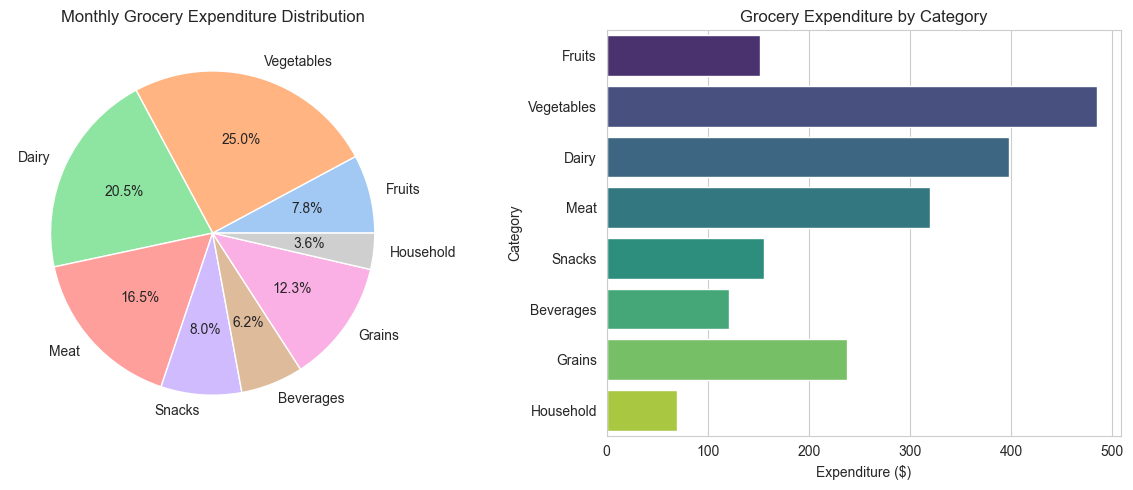

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Synthetic Monthly Grocery Expenditure Data
def generate_grocery_data(csv_filename="grocery_expenditure.csv"):
    np.random.seed(42)
    
    categories = ["Fruits", "Vegetables", "Dairy", "Meat", "Snacks", "Beverages", "Grains", "Household"]
    expenditure = np.random.randint(50, 500, size=len(categories))  # Random expenditure values

    data = {
        "Category": categories,
        "Expenditure": expenditure
    }
    
    df = pd.DataFrame(data)
    df.to_csv(csv_filename, index=False)
    print(f"CSV file '{csv_filename}' generated.")

# Step 2: Read CSV and Extract Category Names
def extract_text_from_csv(csv_filename="grocery_expenditure.csv"):
    df = pd.read_csv(csv_filename)
    category_names = df["Category"]
    return df, category_names

# Step 3: Perform Visualization (Pie Chart & Bar Graph)
def visualize_grocery_data(df):
    plt.figure(figsize=(12, 5))

    # Pie Chart
    plt.subplot(1, 2, 1)
    plt.pie(df["Expenditure"], labels=df["Category"], autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title("Monthly Grocery Expenditure Distribution")

    # Bar Graph
    plt.subplot(1, 2, 2)
    sns.barplot(x="Expenditure", y="Category", data=df, palette="viridis")
    plt.xlabel("Expenditure ($)")
    plt.ylabel("Category")
    plt.title("Grocery Expenditure by Category")

    plt.tight_layout()
    plt.show()

# Run the functions
generate_grocery_data()  # Step 1: Generate data
df, category_names = extract_text_from_csv()  # Step 2: Extract text
visualize_grocery_data(df)  # Step 3: Visualize data


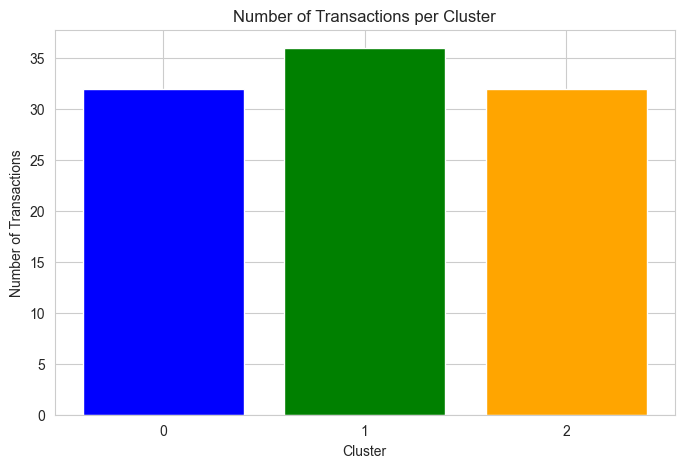

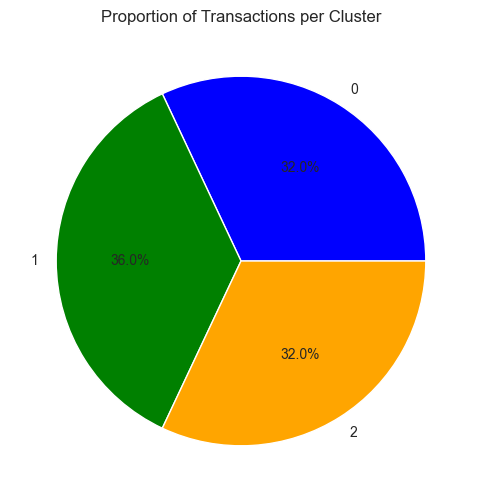

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic data
np.random.seed(42)
categories = ['Groceries', 'Entertainment', 'Subscriptions', 'Dining', 'Transport', 'Healthcare']
data = {
    'Category': np.random.choice(categories, 100),
    'Frequency': np.random.randint(1, 31, 100),  # Number of days transaction repeats
    'Price': np.random.randint(5, 500, 100)  # Amount spent
}
df = pd.DataFrame(data)

# Save synthetic data to CSV
df.to_csv('synthetic_data.csv', index=False)

# Scale the data
scaler = MinMaxScaler()
df[['Frequency', 'Price']] = scaler.fit_transform(df[['Frequency', 'Price']])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Frequency', 'Price']])

# Add cluster centers to DataFrame
df['Cluster_Center_Frequency'] = df['Cluster'].apply(lambda x: kmeans.cluster_centers_[x][0])
df['Cluster_Center_Price'] = df['Cluster'].apply(lambda x: kmeans.cluster_centers_[x][1])

# Save clustered data to CSV
df.to_csv('clustered_data.csv', index=False)

# Visualize results with bar chart
cluster_counts = df['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.index, cluster_counts.values, color=['blue', 'green', 'orange'])
plt.xlabel('Cluster')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Cluster')
plt.xticks(cluster_counts.index)
plt.show()

# Visualize results with pie chart
plt.figure(figsize=(6, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=['blue', 'green', 'orange'])
plt.title('Proportion of Transactions per Cluster')
plt.show()


In [ ]:
import gradio as gr

# Dummy user database
users = {"user1": {"password": "pass123", "balance": 5000}}

# Function to authenticate user
def authenticate(username, password):
    if username in users and users[username]["password"] == password:
        return True
    return False

# Function to check balance
def check_balance(username):
    return f"Your balance: ${users[username]['balance']}"

# Function to deposit money
def deposit(username, amount):
    if amount > 0:
        users[username]["balance"] += amount
        return f"Deposited ${amount}. {check_balance(username)}"
    return "Invalid deposit amount!"

# Function to withdraw money
def withdraw(username, amount):
    if 0 < amount <= users[username]["balance"]:
        users[username]["balance"] -= amount
        return f"Withdrawn ${amount}. {check_balance(username)}"
    return "Invalid withdrawal amount or insufficient funds!"

# Gradio UI
def banking_interface(username, password, action, amount):
    if not authenticate(username, password):
        return "Invalid login credentials!"
    
    if action == "Check Balance":
        return check_balance(username)
    elif action == "Deposit":
        return deposit(username, amount)
    elif action == "Withdraw":
        return withdraw(username, amount)
    else:
        return "Invalid action!"

iface = gr.Interface(
    fn=banking_interface,
    inputs=[
        gr.Textbox(label="Username"),
        gr.Textbox(label="Password", type="password"),
        gr.Radio(["Check Balance", "Deposit", "Withdraw"], label="Action"),
        gr.Number(label="Amount", value=0)
    ],
    outputs=gr.Textbox(label="Output"),
    title="Secure Banking System",
    description="Login to check balance, deposit, or withdraw money securely."
)

iface.launch()

In [7]:
import gradio as gr

def homepage():
    return """
    <style>
        body {
            font-family: Arial, sans-serif;
            background: url('bank-building.jpg') no-repeat center center/cover;
            color: #fff;
            text-align: center;
        }
        .navbar {
            display: flex;
            justify-content: space-between;
            align-items: center;
            padding: 15px 20px;
            background-color: #fff;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
        }
        .navbar ul {
            list-style: none;
            display: flex;
        }
        .navbar ul li {
            margin: 0 15px;
        }
        .navbar ul li a {
            text-decoration: none;
            color: #333;
            font-weight: bold;
            transition: color 0.3s ease-in-out;
        }
        .navbar ul li a:hover {
            color: #004080;
        }
        .hero {
            position: relative;
            height: 80vh;
            display: flex;
            align-items: center;
            justify-content: center;
            text-align: center;
        }
        .hero::before {
            content: "";
            position: absolute;
            top: 0;
            left: 0;
            width: 100%;
            height: 100%;
            background: rgba(0, 0, 0, 0.6);
        }
        .hero div {
            position: relative;
        }
        .hero h1 {
            font-size: 3rem;
        }
        .hero p {
            font-size: 1.5rem;
        }
    </style>
    <nav class="navbar">
        <div class="logo"><h2 style="color: #004080;">TrustBank</h2></div>
        <ul>
            <li><a href="#">Home</a></li>
            <li><a href="#">About</a></li>
            <li><a href="#">Services</a></li>
            <li><a href="#">Testimonials</a></li>
            <li><a href="#">Contact</a></li>
        </ul>
    </nav>
    <section class="hero">
        <div>
            <h1>Welcome to TrustBank</h1>
            <p>Your Financial Partner for Life</p>
        </div>
    </section>
    """

demo = gr.Blocks()
with demo:
    gr.HTML(homepage())

demo.launch()


* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


In [3]:
import streamlit as st
import fitz  # PyMuPDF
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os

# Function to extract text from PDF
def extract_text_from_pdf(file):
    text = ""
    pdf_document = fitz.open(file)
    for page in pdf_document:
        text += page.get_text()
    return text

# Function to extract text from images using Tesseract OCR
def extract_text_from_image(file):
    image = Image.open(file)
    text = pytesseract.image_to_string(image)
    return text

# Function to process extracted text into a DataFrame (dummy logic)
def process_text_to_dataframe(text):
    lines = text.split('\n')
    data = {'Category': [], 'Amount': []}
    for line in lines:
        if any(char.isdigit() for char in line):  # Simple heuristic
            parts = line.split()
            category = ' '.join(parts[:-1])
            amount = parts[-1].replace('$', '').replace(',', '')
            try:
                amount = float(amount)
                data['Category'].append(category)
                data['Amount'].append(amount)
            except ValueError:
                continue
    return pd.DataFrame(data)

st.title("Financial Document Analyzer")

uploaded_file = st.file_uploader("Upload Invoice/Payslip/Bank Statement (PDF/Image)", type=["pdf", "png", "jpg", "jpeg"])

if uploaded_file is not None:
    file_extension = os.path.splitext(uploaded_file.name)[1].lower()
    
    if file_extension == ".pdf":
        extracted_text = extract_text_from_pdf(uploaded_file)
    else:
        extracted_text = extract_text_from_image(uploaded_file)
    
    st.subheader("Extracted Text")
    st.text_area("", extracted_text, height=200)
    
    df = process_text_to_dataframe(extracted_text)
    if not df.empty:
        st.subheader("Extracted Financial Data")
        st.write(df)
        
        # Bar Chart
        fig_bar = px.bar(df, x='Category', y='Amount', title="Financial Breakdown", text_auto=True)
        st.plotly_chart(fig_bar)
        
        # Pie Chart
        fig_pie = px.pie(df, names='Category', values='Amount', title="Expense Distribution")
        st.plotly_chart(fig_pie)
    else:
        st.warning("No structured financial data detected. Please check the document format.")

2025-03-06 21:05:18.831 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 21:05:19.327 
  command:

    streamlit run C:\Users\yguru\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-06 21:05:19.327 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 21:05:19.328 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 21:05:19.329 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 21:05:19.330 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 21:05:19.331 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-06 21:05:19.332 Thre